In [13]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from sklearn.model_selection import KFold
from keract import get_activations, display_activations, display_heatmaps

In [2]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 250
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

In [3]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [4]:
# Reshape data based on channels first / channels last strategy.
# This is dependent on whether you use TF, Theano or CNTK as backend.
# Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 1, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)

In [5]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [6]:
# Convert target vectors to categorical targets
target_train = tensorflow.keras.utils.to_categorical(target_train, no_classes)
target_test = tensorflow.keras.utils.to_categorical(target_test, no_classes)

In [7]:
# Create the model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [8]:
# Compile the model
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
# Fit data to model
model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

Epoch 1/25
192/192 [==============================] - 8s 40ms/step - loss: 1.7245 - accuracy: 0.8369 - val_loss: 0.2609 - val_accuracy: 0.9331
Epoch 2/25
192/192 [==============================] - 7s 36ms/step - loss: 0.1609 - accuracy: 0.9556 - val_loss: 0.1760 - val_accuracy: 0.9563
Epoch 3/25
192/192 [==============================] - 7s 36ms/step - loss: 0.0807 - accuracy: 0.9751 - val_loss: 0.1426 - val_accuracy: 0.9634
Epoch 4/25
192/192 [==============================] - 7s 36ms/step - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.1413 - val_accuracy: 0.9639
Epoch 5/25
192/192 [==============================] - 7s 36ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.1358 - val_accuracy: 0.9688
Epoch 6/25
192/192 [==============================] - 7s 37ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.1368 - val_accuracy: 0.9688
Epoch 7/25
192/192 [==============================] - 7s 36ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.1279 - val_accuracy: 0.9718

In [10]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.14312443137168884 / Test accuracy: 0.9807999730110168


conv2d_input (1, 28, 28, 1) 


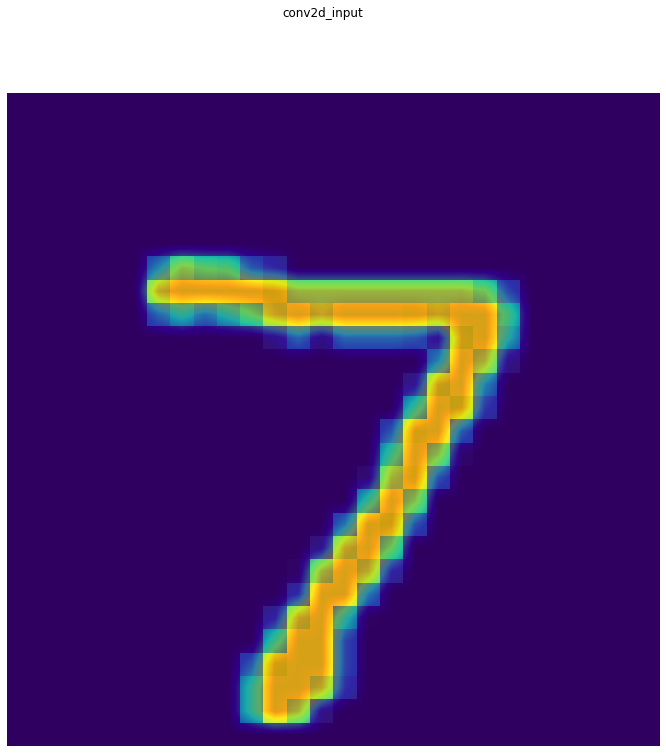

conv2d (1, 24, 24, 6) 


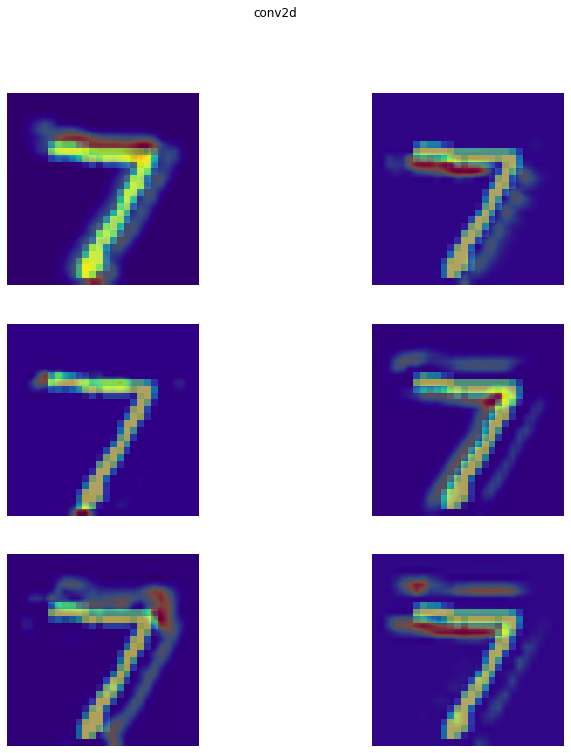

max_pooling2d (1, 12, 12, 6) 


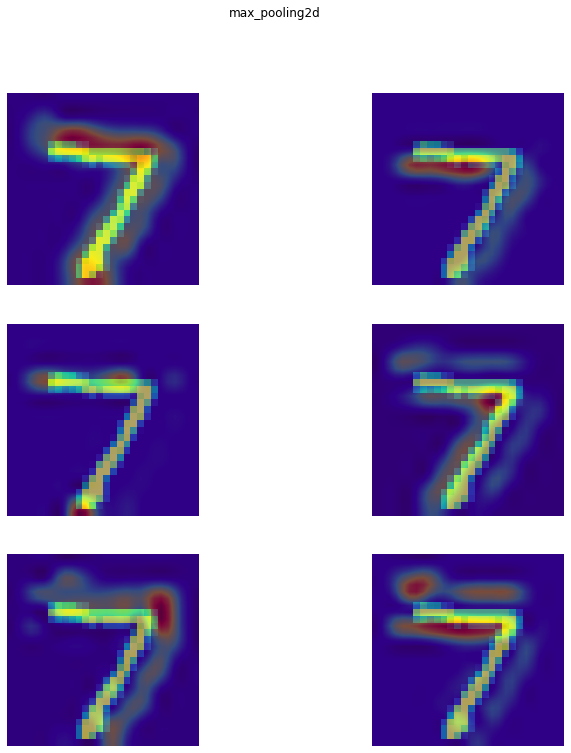

conv2d_1 (1, 8, 8, 10) 


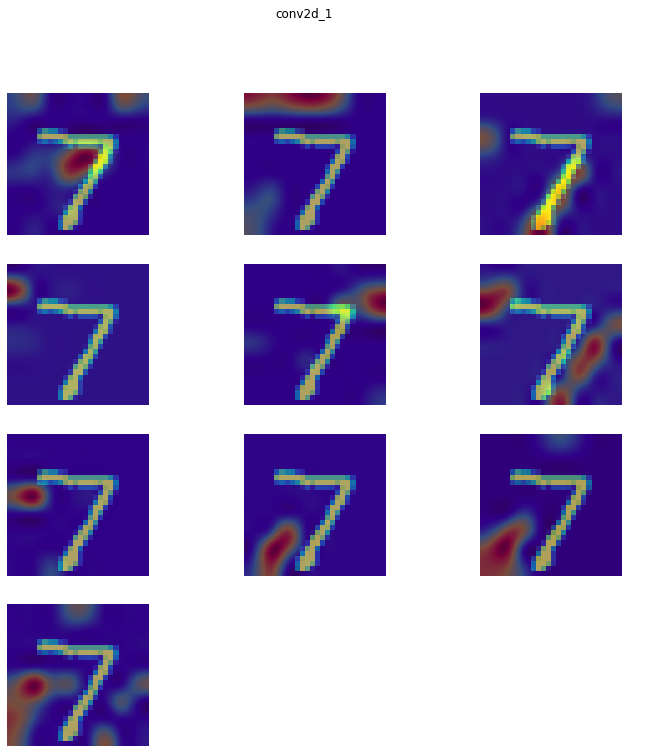

flatten (1, 640) -> Skipped. 2D Activations.
dense (1, 256) -> Skipped. 2D Activations.
dense_1 (1, 10) -> Skipped. 2D Activations.


In [15]:
# =============================================
# Keract visualizations
# =============================================
keract_inputs = input_test[:1]
keract_targets = target_test[:1]
activations = get_activations(model, keract_inputs)
#display_activations(activations, cmap="gray", save=False)
display_heatmaps(activations, keract_inputs, save=False)